In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import cv2
%matplotlib inline

**Finding Gaussian Kernel Value**


```
g(x) = 1/sqrt(2.pi.sigma).e^(-(x^2+y^2))
```



In [5]:
# sigma = 1
for i in range(-3, 4):
  # print(i, end='    ')
  for j in range(-3, 4):
    g = math.exp(-((i * i) + (j * j)) / 2)
    g = g/math.sqrt(2 * math.pi)
    g = g / 0.399   # to make center value 1
    g = g * 4       # to make center value more weighted and other value greater than one 
    print("{0:.3f}".format(round(g)), end=',   ')
  print()

'''
now we can easily find out the gaussian two dimensional kernel
from center point of size 3x3 kernel size be like,
1 2 1
2 4 2
1 2 1

'''


0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   1.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   1.000,   2.000,   1.000,   0.000,   0.000,   
0.000,   1.000,   2.000,   4.000,   2.000,   1.000,   0.000,   
0.000,   0.000,   1.000,   2.000,   1.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   1.000,   0.000,   0.000,   0.000,   
0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   0.000,   


'\nnow we can easily find out the gaussian two dimensional kernel\nfrom center point of size 3x3 kernel size be like,\n1 2 1\n2 4 2\n1 2 1\n\n'

**Gaussian Filtering example and Seperatibility property of Gaussian.**

1.   **Apply Gaussian in x direction. Then Apply in y direction require 2n multiplication**
2.   **Apply Gaussian in both x-y direction require n^2 multiplication**

***Both are same***

In [0]:

img = np.array([[15, 20, 25, 25, 15, 10],
       [20, 15, 50, 30, 20, 15],
       [20, 50, 55, 60, 30, 20],
       [20, 15, 65, 30, 15, 30],
       [15, 20, 30, 20, 25, 30],
       [20, 25, 15, 20, 10, 15]])

gaussian_kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]
gaussian_kernel_1d = [1, 2, 1]

# print(img, len(img))
new_img = img.copy()

print("Apply x directional kernel")
for i in range(0, len(img)):
  for j in range(1, len(img[0]) - 1):
    pixel_matrix = img[i, j - 1 : j + 2]
    val_m = pixel_matrix * gaussian_kernel_1d
    val = round(val_m.sum() / 4)
    new_img[i][j] = val
print(new_img)

print("Applying y directional kernel in new image")
for j in range(0, len(new_img[0])):
  for i in range(1, len(new_img) - 1):
    pixel_matrix = new_img[i - 1: i + 2,j]
    val_m = pixel_matrix * gaussian_kernel_1d
    val = round(val_m.sum() / 4)
    new_img[i][j] = val
print(new_img)


print("Apply both kernel")
for i in range(1, len(img) - 2):
  for j in range(1, len(img[0]) - 2):
    pixel_matrix = img[i - 1 : i + 2, j - 1 : j + 2]
    val_m = pixel_matrix * gaussian_kernel
    val = round(val_m.sum() / 16)
    new_img[i][j] = val

print(new_img)


Apply x directional kernel
[[15 20 24 22 16 10]
 [20 25 36 32 21 15]
 [20 44 55 51 35 20]
 [20 29 44 35 22 30]
 [15 21 25 24 25 30]
 [20 21 19 16 14 15]]
Applying y directional kernel in new image
[[15 20 24 22 16 10]
 [19 28 38 34 23 15]
 [20 36 48 43 29 21]
 [19 29 40 34 24 28]
 [17 23 27 24 22 26]
 [20 21 19 16 14 15]]
Apply both kernel
[[15 20 24 22 16 10]
 [19 28 38 35 23 15]
 [20 35 48 42 29 21]
 [19 31 42 36 24 28]
 [17 23 27 24 22 26]
 [20 21 19 16 14 15]]


**Convert RGB value to GrayScale Value**

In [0]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


**Gaussina Filtering examples in image with customize implementation**

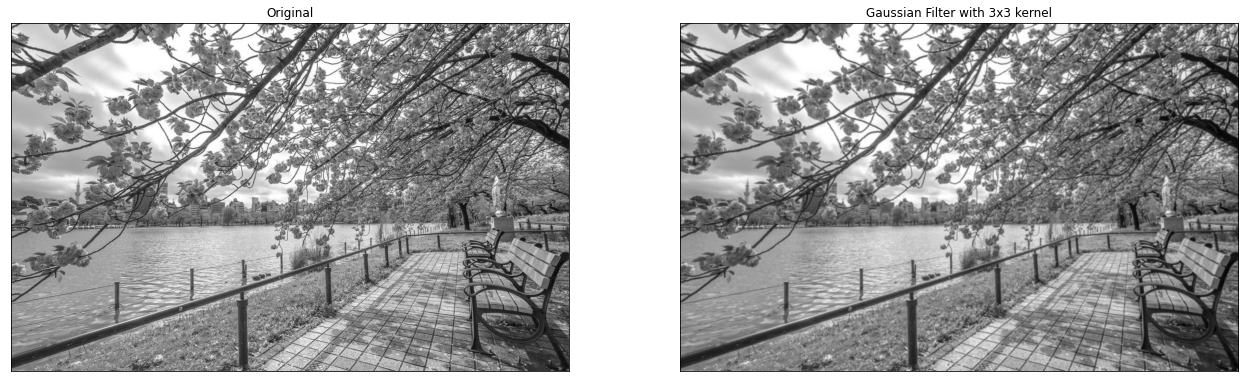

In [0]:

# img = plt.imread('place.jpg')
rgb_img = plt.imread('place.jpg')
img = rgb2gray(rgb_img)

gaussian_kernel = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]

new_img = img.copy()

n, m = img.shape
# print(n, m)
# print(img)

for i in range(1, n - 2):
  for j in range(1, m - 2):
    pixel_matrix = img[i - 1 : i + 2, j - 1 : j + 2]
    val_m = pixel_matrix * gaussian_kernel
    val = round(val_m.sum() / 16)
    new_img[i][j] = val

# new_img = new_img / new_img.max()
plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_img, cmap='gray')
plt.title("Gaussian Filter with 3x3 kernel")
plt.xticks([])
plt.yticks([])
plt.show()

**Apply Gaussian Filtering in image using library function**

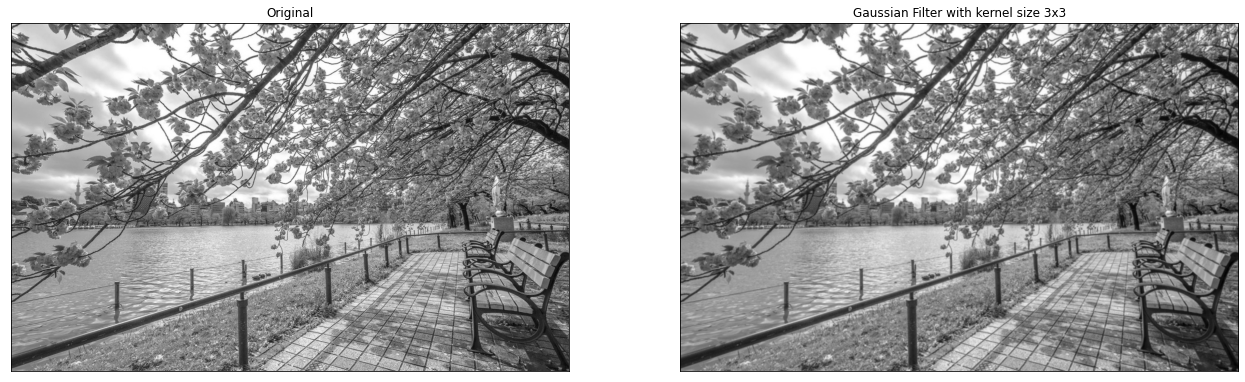

In [0]:
image = cv2.imread('place.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 3 # the dimension of the x and y axis of the kernal(mask).

image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
new_image = cv2.GaussianBlur(image2, (figure_size, figure_size), 0)

plt.figure(figsize=(22,12))
plt.subplot(121)
plt.imshow(image2, cmap='gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(new_image, cmap='gray')
plt.title("Gaussian Filter with kernel size 3x3")
plt.xticks([])
plt.yticks([])
plt.show()